# Project: Dr. Semmelweis and the Discovery of Handwashing.

## 1. Dr. Ignaz Semmelweis

Dr. Ignaz Semmelweis, a Hungarian physician born in 1818 and passing in 1865, is renowned for his pioneering contributions to healthcare's antiseptic procedures. He earned the title "savior of mothers" for his work in Vienna General Hospital's maternity wards during the mid-19th century. Observing a high mortality rate among new mothers due to puerperal fever, he identified the cause: healthcare workers not practicing proper hand disinfection. His proposal to use chlorinated lime for handwashing faced resistance and skepticism from the medical community, challenging established practices and prevailing disease theories. Despite the initial opposition, Semmelweis's ideas laid the foundation for modern infection control.

In this notebook, we will revisit and reanalyze the data that led Dr. Semmelweis to recognize the significance of handwashing. To begin, let's examine the data that alerted Dr. Semmelweis to potential issues with the protocols at Vienna General Hospital.

In [45]:
# Importing modules
import pandas as pd

In [46]:
# Import the datasets.
df_yearly = pd.read_csv('yearly_deaths_by_clinic.csv')
df_monthly = pd.read_csv('monthly_deaths.csv')

In [47]:
df_yearly.columns

Index(['year', 'births', 'deaths', 'clinic'], dtype='object')

In [48]:
df_monthly.columns

Index(['date', 'births', 'deaths'], dtype='object')

In [49]:
print(df_yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


The table provided above displays the childbirth statistics for both clinics at Vienna General Hospital from 1841 to 1846. It becomes evident that childbirth was associated with significant risks, with a disturbingly high number of women losing their lives, primarily due to childbed fever.

## 2. The alarming number of deaths

To see more clearly about the alarming number of deaths, we can calculate the proportion of deaths per no. of births. 


In [50]:
# Calculate the proportion of deaths per no. of births
df_yearly['proportion_deaths'] = df_yearly['deaths'] / df_yearly['births']

In [51]:
# Extract Clinic 1 data into clinic_1 and Clinic 2 data into clinic_2
clinic_1 = df_yearly[df_yearly['clinic'] == 'clinic 1']
clinic_2 = df_yearly[df_yearly['clinic'] == 'clinic 2']

In [52]:
# print the proportion of deats per no. of births for clinic 1
print(clinic_1)

   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1           0.078063
1  1842    3287     518  clinic 1           0.157591
2  1843    3060     274  clinic 1           0.089542
3  1844    3157     260  clinic 1           0.082357
4  1845    3492     241  clinic 1           0.069015
5  1846    4010     459  clinic 1           0.114464


## 3. Death at the clinic

When we graphically represent the mortality rates at both Clinic 1 and Clinic 2, an intriguing pattern emerges...

In [53]:
# Import matplotlib
import matplotlib as plt

<Axes: xlabel='year', ylabel='Proportion deaths'>

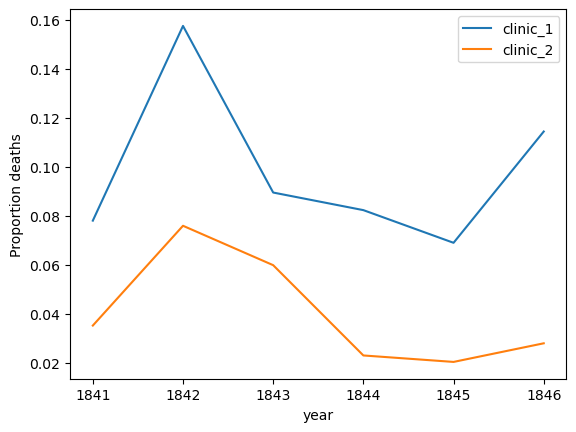

In [54]:
# Plot yearly proportion of deaths at the two clinics
ax = clinic_1.plot(x="year", y="proportion_deaths",
              label="clinic_1")
clinic_2.plot(x="year", y="proportion_deaths",
         label="clinic_2", ax=ax, ylabel="Proportion deaths")

## 4. The handwasing begins

Why does Clinic 1 consistently exhibit a significantly higher death rate? Dr. Semmelweis observed the same unsettling trend and was both perplexed and distressed. The sole distinction between the two clinics was that Clinic 1 was predominantly staffed by medical students, whereas Clinic 2 primarily had midwife students. While midwives exclusively attended to women during childbirth, medical students also engaged in post-mortem examinations in the autopsy rooms.

Dr. Semmelweis began to entertain the notion that something from the corpses might be transmitting an agent responsible for childbed fever via the hands of the medical students. In a desperate effort to curb the alarming mortality rates, he issued a controversial and unconventional decree: "Wash your hands!" It's important to note that, during this period in Vienna, the concept of bacteria was unknown, making this directive unorthodox and met with skepticism.

Let's load in monthly data from Clinic 1 to see if the handwashing had any effect.

In [55]:
# Calculate proportion of deaths per no. births
df_monthly['proportion_deaths'] = df_monthly['deaths']/df_monthly['births']


In [56]:
# Print out the df_monthly
print(df_monthly)

          date  births  deaths  proportion_deaths
0   1841-01-01     254      37           0.145669
1   1841-02-01     239      18           0.075314
2   1841-03-01     277      12           0.043321
3   1841-04-01     255       4           0.015686
4   1841-05-01     255       2           0.007843
..         ...     ...     ...                ...
93  1848-11-01     310       9           0.029032
94  1848-12-01     373       5           0.013405
95  1849-01-01     403       9           0.022333
96  1849-02-01     389      12           0.030848
97  1849-03-01     406      20           0.049261

[98 rows x 4 columns]


## 5. The handwashing effect

Now that the data is uploaded, we can proceed to examine the mortality rate over a period. In the following graph, we haven't explicitly indicated when mandatory handwashing was introduced, but its impact was so significant that you should be able to discern it!

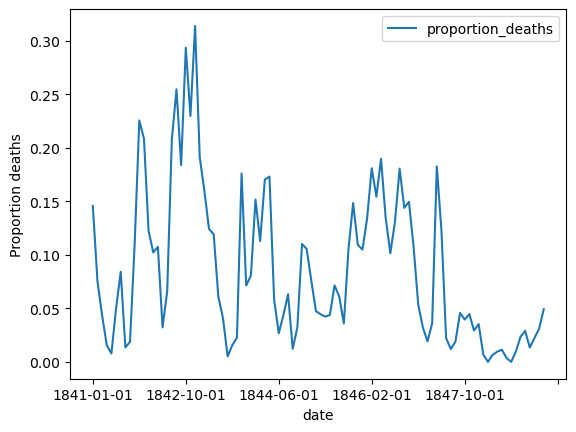

In [57]:
# Plot monthly proportion of deaths
ax = df_monthly.plot(x="date", y="proportion_deaths", ylabel="Proportion deaths")

## 6. Highlighting the handwashing effect.

Commencing in the summer of 1847, there is a substantial decline in the mortality rate, coinciding with the moment when Semmelweis mandated handwashing.

To accentuate the impact of handwashing, we can further emphasize this on the graph.

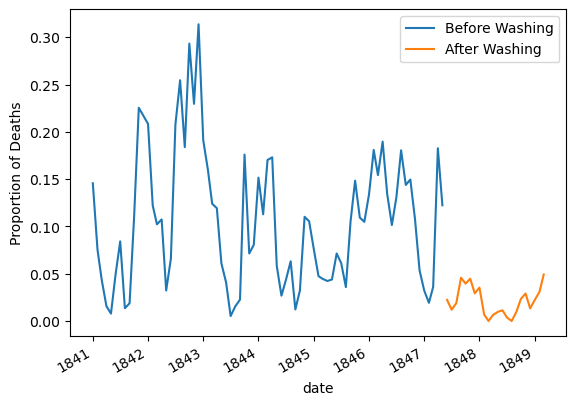

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime64 format
df_monthly['date'] = pd.to_datetime(df_monthly['date'])

# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly data into before and after handwashing_start
before_washing = df_monthly[df_monthly['date'] < handwashing_start]
after_washing = df_monthly[df_monthly['date'] >= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x="date", y="proportion_deaths", label="Before Washing")
after_washing.plot(x="date", y="proportion_deaths", label="After Washing", ax=ax)

# Add a label to the y-axis
plt.ylabel("Proportion of Deaths")

# Show the plot
plt.show()


## 7. More handwashing, fewer deaths?

Again, the graph shows that handwashing had a huge effect. How much did it reduce the monthly proportion of deaths on average?

In [59]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']

In [60]:
before_proportion.mean()

0.10504998260908789

In [61]:
after_proportion.mean()

0.021093375097254535

In [62]:
mean_diff = after_proportion.mean() - before_proportion.mean()

In [63]:
mean_diff

-0.08395660751183336

## 8. A Bootstrap analysis of Semmelweis handwashing data

It led to a significant decrease in the mortality rate, lowering it by approximately 8 percentage points. The average rate dropped from 10% to just 2%, though it's worth noting that even 2% remains relatively high by today's standards.

To assess the level of uncertainty regarding the extent to which handwashing reduces mortality, we can examine a confidence interval. This interval, calculated using the bootstrap method, provides insights into the range of potential outcomes.

In [64]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append( boot_after.mean() - boot_before.mean() )

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.101812
0.975   -0.067223
dtype: float64

## 9. The fate of Dr. Semmelweis

Hence, handwashing was shown to reduce the mortality rate by an estimated range of 6.7 to 10 percentage points, as indicated by a 95% confidence interval. This compelling evidence strongly supported Semmelweis's assertion that handwashing was a straightforward yet highly effective practice capable of saving numerous lives.

Regrettably, the tragedy lies in the fact that despite the robust evidence, Semmelweis's theory, which linked childbed fever to a "substance" (now identified as bacteria) from autopsy room cadavers, faced ridicule from contemporary scientists. The medical community largely dismissed his groundbreaking discovery, leading to his departure from Vienna General Hospital in 1849.

One contributing factor to this rejection was the rarity of statistics and statistical arguments within medical science during the 1800s. Semmelweis presented his data solely in the form of extensive tables of raw data, lacking graphical representation and confidence intervals. Had he possessed the analytical tools we've employed here, he might have had greater success in persuading Viennese doctors to adopt handwashing practices.

Source: Datacamp.com